## Quadrature formulas

We need to find out the weights $w_i$ to apply to the nodes $x_i$, for the Newton-Cotes quadrature rules. Given equispaced points $x_i$ in the interval $[a,b]$, we can calculate the weights $w_i$:

* with $k=0$:
$$\sum_{i=0}^n x_i^{k=0} \cdot w_i = \int_a^b x^{k=0} = {\frac{x^{k+1}}{k+1}}\vert_a^b = \frac{b^{k+1} - a^{k+1}}{k+1}$$

$$\sum_{i=0}^n 1 \cdot w_i = b - a$$

* with $k=1$:
$$\sum_{i=0}^n x_i^{k=1} \cdot w_i = \sum_{i=0}^n x_i \cdot w_i = \frac{b^{k+1} - a^{k+1}}{k+1} = \frac{b^2 - a^2}{2}$$

* with $k=2$:
$$\sum_{i=0}^n x_i^{k=2} \cdot w_i = \sum_{i=0}^n x_i^2 \cdot w_i = \frac{b^{k+1} - a^{k+1}}{k+1} = \frac{b^3 - a^3}{3}$$


In [21]:
# Python imports and setup not specific to the subject.
import numpy as np
np.core.arrayprint._line_width = 100
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge
plt.rcParams['figure.figsize'] = np.array([6., 4.]) * 2.5

In [50]:
def _calculate_weights(nodes, interval):
    a, b = interval
    coefficient_matrix = np.empty([nodes.shape[0]] * 2)
    parameters = np.empty_like(nodes)
    
    for k in range(nodes.shape[0]):
        coefficient_matrix[k] = nodes ** k
        parameters[k] = (b ** (k+1) - a ** (k+1)) / (k + 1)
        
    return np.linalg.solve(coefficient_matrix, parameters)

def compute_cheby(n_pts, interval=(-1, 1)):
    a, b = interval
    _n_spaces = n_pts+1
    angles = np.pi/_n_spaces * np.arange(1, _n_spaces)
    x_orig, y_orig = np.cos(angles), np.sin(angles)
    
    # Scale the values to the (a, b) interval.
    scaler = lambda arr: .5 * (a + b) + (.5 * (b - a)) * arr
    return scaler(x_orig) # , scaler(y_orig)

def integrator_newton_cotes(func, interval, num_nodes, use_cheby=False, open_interval=True):
    # Extract the extremes [a, b] of the interval.
    a, b = interval
    
    _n_nodes = num_nodes + 1
    if open_interval:
        _n_nodes += 2
    
    if use_cheby:
        interval_points = compute_cheby(_n_nodes, interval=interval)
    else:
        interval_points = np.linspace(a, b, _n_nodes)    
    
    if open_interval:
        # Discard the first and last elements.
        interval_points = interval_points[1:-1]
    
    weights = _calculate_weights(interval_points, (a, b))

    points = np.array([func(x_i) for x_i in interval_points])
    
    return np.sum(np.multiply(points, weights))

In [39]:
exp_func = lambda x: np.exp(-x)
nc_integration_exp = integrator_newton_cotes(exp_func, [0, 1], num_nodes=10, open_interval=True)
nc_integration_exp

0.6321205588285544

The difference between the exact integration value and the value obtained using the Newton-Cotes quadrature formula:

In [29]:
np.abs(nc_integration_exp - (1 - 1/np.e))

3.219646771412954e-15

### Runge function

In [30]:
runge_func = lambda x: 1./(1 + x**2)
interval = [-5, 5]

integrator_newton_cotes(runge_func, interval, num_nodes=10, open_interval=True)

-43.63917029583033

In [31]:
nc_integration_runge = integrator_newton_cotes(runge_func, interval, num_nodes=10, open_interval=False)
nc_integration_runge

4.6733005556617

In [32]:
np.abs(nc_integration_runge - 2 * np.arctan(5))

1.9264990217716682

## Plotting errors

For the previous problems, since we know the exact solution, an error analysis can be performed.

In [47]:
def plot_errors(func, exact_integrated_value, interval, use_cheby=False, open_interval=True, max_nodes=40):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_yscale('log')
    
    integrated_values = np.array([integrator_newton_cotes(func, interval, num_nodes=n, use_cheby=use_cheby, open_interval=open_interval)
                                      for n in range(max_nodes)])

    errors = np.abs(exact_integrated_value - integrated_values)
    
    ax.plot(range(max_nodes), errors, "-")
    
    ax.grid()
    plt.show()

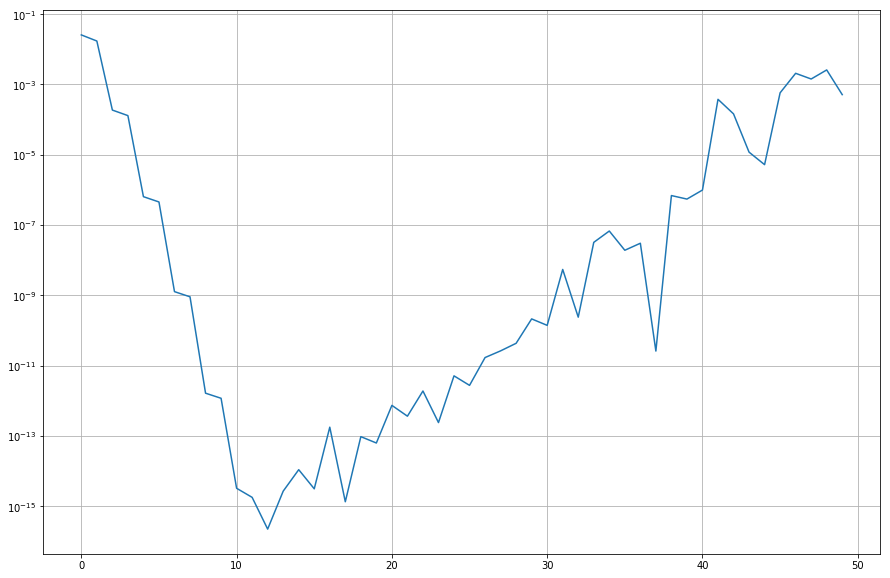

In [48]:
plot_errors(exp_func, 1 - 1./np.e, [0, 1], max_nodes=50)

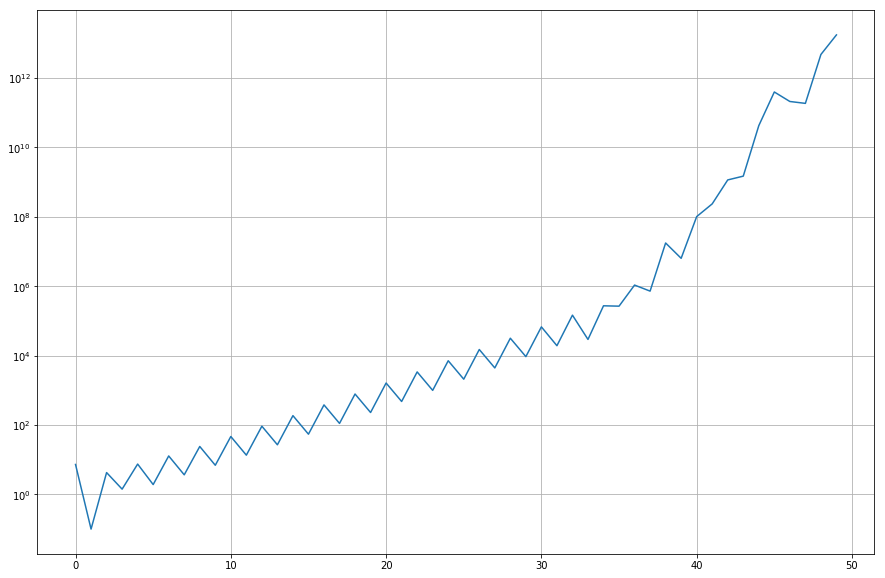

In [36]:
plot_errors(runge_func, 2 * np.arctan(5), [-5, 5], max_nodes=50)

## Using zeros of Chebyshev polynomials

We are now going to use the zeros of Chebyshev polynomials as nodes of the Newton-Cotes quadrature formula.

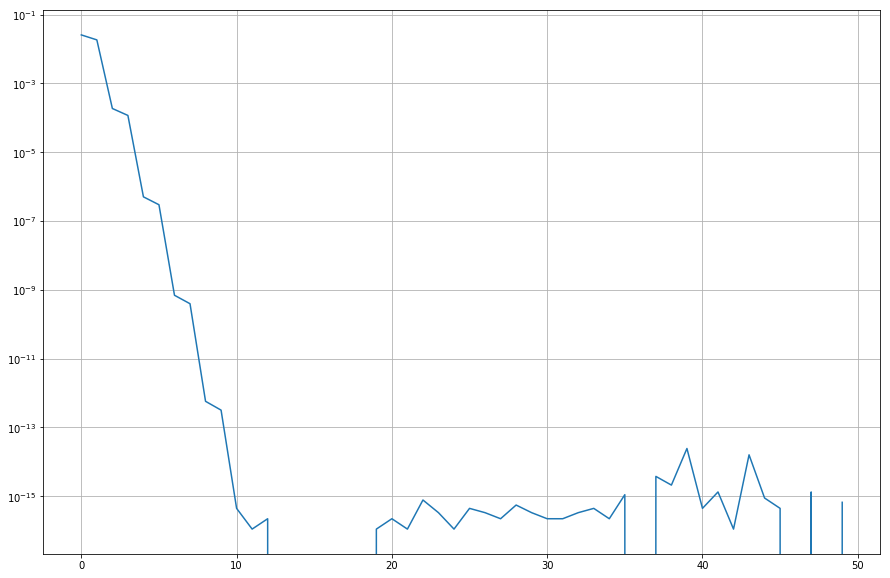

In [40]:
plot_errors(exp_func, 1 - 1./np.e, [0, 1], use_cheby=True, max_nodes=50)

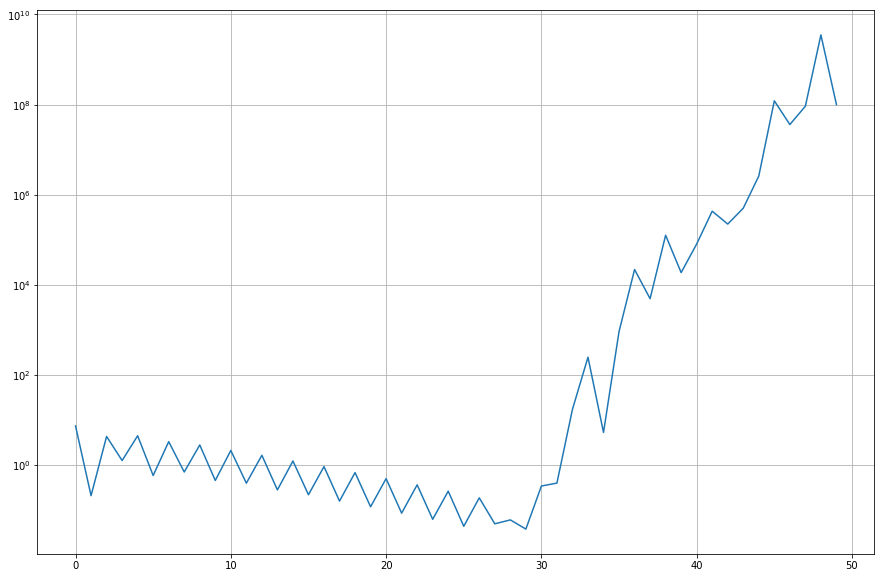

In [49]:
plot_errors(runge_func, 2 * np.arctan(5), [-5, 5], use_cheby=True, max_nodes=50)